## Exploratory Data Analysis with Clustering in mind:

> What do we want to know about this data

Why may clustering be useful here?
 - We may not always walk into a project with the goal of using clustering as a first measure, it may be something that happens a little more organically as we investigate the interactions happening in the structure of our data

How would we potentially use Clustering?

 - Identification of nonlinear relationships

Clustering in and of itself is purely unsupervised, which means that its an algorithmic structure that does not have a label or a target in mind.  This does not mean, however, that we will not be using it to leverage in the scope of more nuanced feature engineering for supervised problems

Ways to use clustering:
 - Exploration of segments (Tell me more about our customers)

In [2]:
from pydataset import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

So, take iris, if we were looking at the iris dataset and did not have labels available, what could we say about this data set?

We dont know what species these flowers are, but if we look at the data present inside the petal lengths, it appears that there are at least two distinct groups here.

We will talk about how to determine the "best" number of groups in a situation where we do not have pure labels, but in the meantime, we can attempt to divine out how "useful" groupings like this may be

In [3]:
iris = data('iris')

In [5]:
iris.columns = [col.lower().replace('.','_') for col in iris.columns]

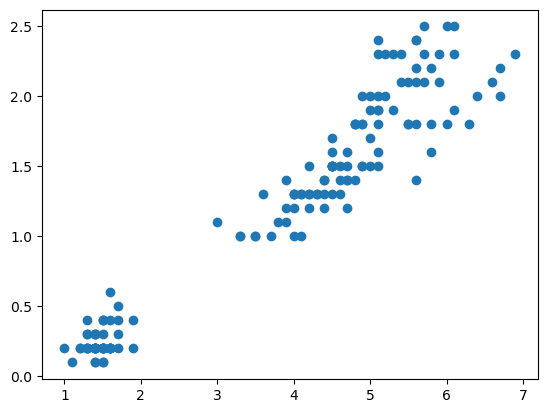

In [6]:
plt.scatter(iris.petal_length, iris.petal_width)

 - Way number 2: Using clusters as features for a supervised problem
 Clusters are labels once they are created, which also means that they can be interpreted as categorical features

 - Way number 3: Create segments based on clusters

 - Way number 4: Use clusters to more cleverly investigate outliers or extrema under the lens of anomaly detection 

In [7]:
# grab my mall data:
import wrangle
train, validate, test = wrangle.wrangle_mall()

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

In [8]:
# what questions do we want to ask of this data?
#  does one gender spend more? (do we know how to answer this?)

So with this dataset, we have a spending score present as one of our features.  We may want to use spending score as a target and examine what demographic features lead to spending score...

But I dont really know how we got spending score, so I'm not positive if thats the case.  Depending on the stakeholder ask, where the data is coming from, and what you want to know about it, the framing of your questions will vary along with what you want to know from clustering in general

In [9]:
train.columns

Index(['gender', 'age', 'annual_income', 'spending_score', 'age_scaled',
       'annual_income_scaled', 'spending_score_scaled', 'is_male'],
      dtype='object')

In [10]:
# lets start off the same way as we have historically with EDA

In [11]:
# narrow down my features to what I want to explore on
numericals = ['annual_income', 'spending_score', 'age']
categoricals = ['gender']
explore_cols = numericals + categoricals

In [12]:
explore_cols

['annual_income', 'spending_score', 'age', 'gender']

In [13]:
# I have done so far:
# summarization of my data
# Things I want to do to know more about my data:
# distribution plots -> shape of data and spread
# look at variable interactions -> q1: does gender matter?
# look to see if there are any visible customer segments
# based specifically on income spending score, and gender
# q2: are there defined pockets in spending score in general?
# (is there value in examining clusters here?)

In [14]:
# step 1: univariate exploration

In [17]:
# lets create a few histograms here on train[numericals]

In [ ]:
# three columns that are continuous,
# three plots that I want to make,
# and three axis objects


In [27]:
dict(zip([0,1,2,3], ['a','b','c','d']))

{0: 'a', 1: 'b', 2: 'c', 3: 'd'}

In [28]:
for i, let in zip([0,1,2,3], ['a','b','c','d']):
    print(f'this is a number: {i}')
    print(f'this is a letter: {let}')

this is a number: 0
this is a letter: a
this is a number: 1
this is a letter: b
this is a number: 2
this is a letter: c
this is a number: 3
this is a letter: d


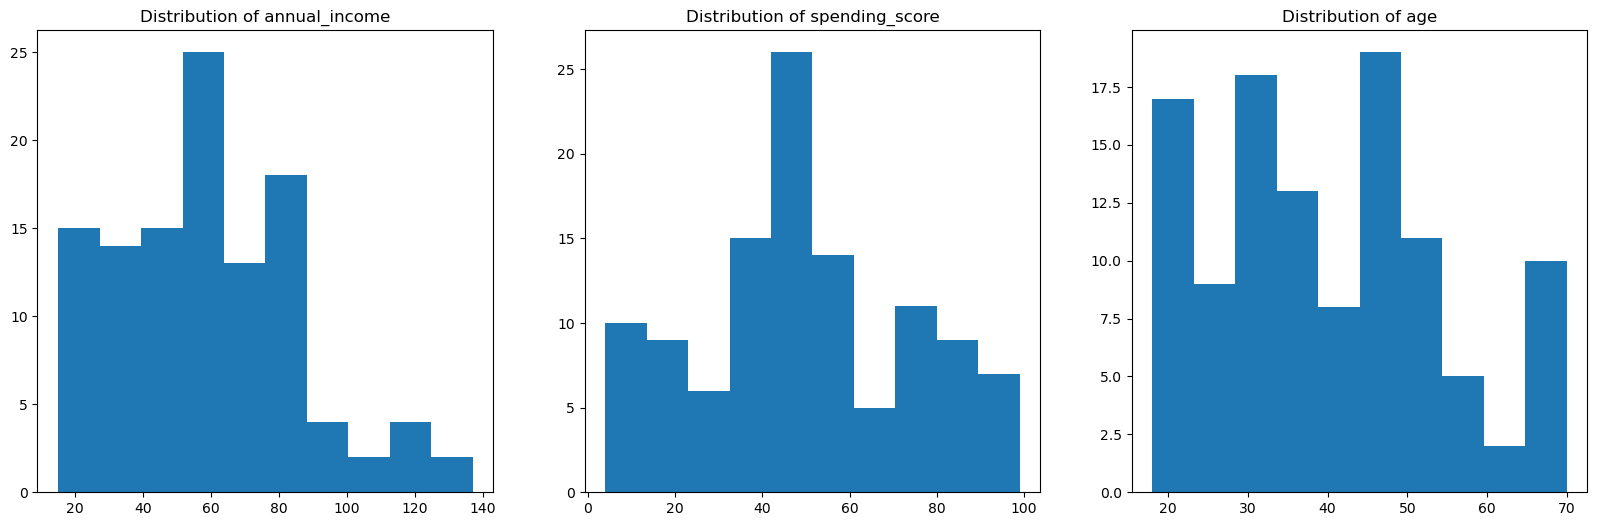

In [31]:
fig, axs = plt.subplots(1,3, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.show()

Takeaways:
 - Immediately from the examination of spending_score, there appear to be pockets of different types of spenders within this data set.
 - Normality: doesnt really look it anywhere
 - annual income: right-tailed, lots of information nearly uniform between 20 and 80, with outliers after that
 - spending score seems trimodal, with at least three distinct pockets or types of customer present even when only looking at a single variable
 - age appears to be jumping around a lot but certainly does not look like a bell curve
 

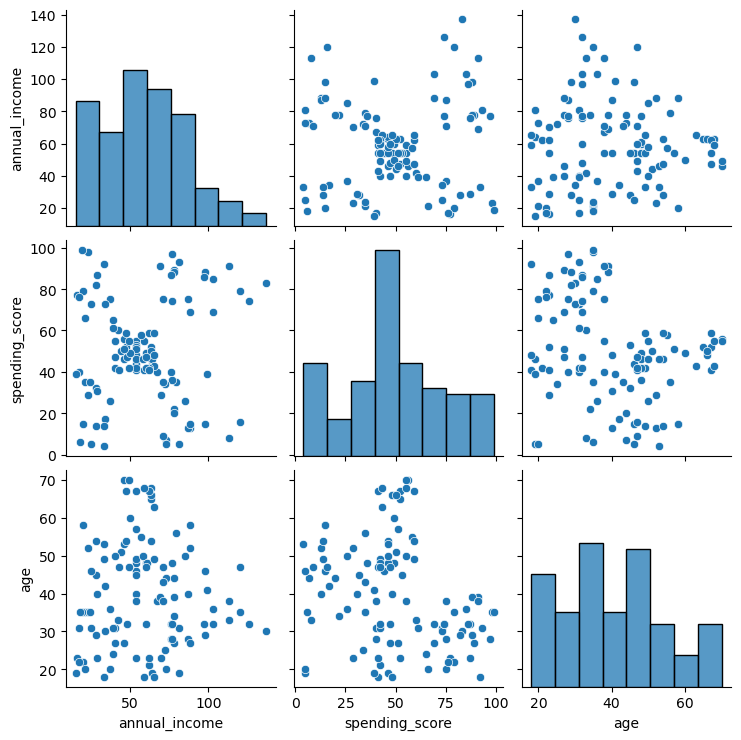

In [33]:
# lets use pairplot to get that birds-eye view of what is going
# on with the present data set
sns.pairplot(data=train[explore_cols])

Initial observations on this info based on a pair plot:
 - Very distinct groups when we examine spending score x income
 - Appears to anchor around a strong middle group, with four other highly volatile categories of customer -- low income/high score, low income/low score, high income/high score, high income/low score
 - What I am interested in knowing a bit more about is if I can figure out these pockets or something close to them based on my other features
 - Age looks like it has something going with spending score as well, but I'm not sure quite how to slice it yet.
 - it looks like we have some information regarding spending scores that dont go above a certain level when a customer is older than 45 or so, and it seems rarer for a customer to have an exceptionally low spending score if they are under the age of 25

> what type plot for a continuous v categorical situation?

In [34]:
# swarm, violin, box

<Axes: xlabel='gender', ylabel='spending_score'>

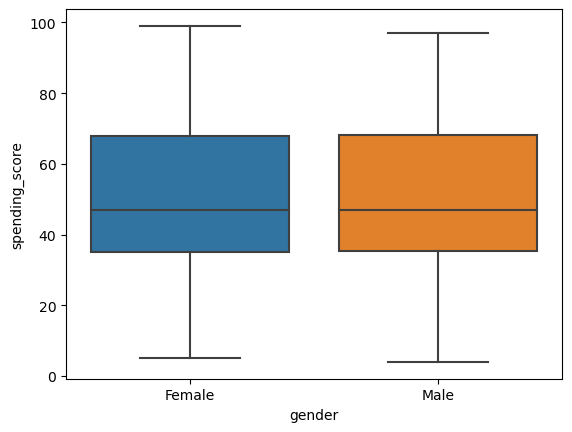

In [36]:
sns.boxplot(data=train, x='gender', y='spending_score')

<Axes: xlabel='gender', ylabel='spending_score'>

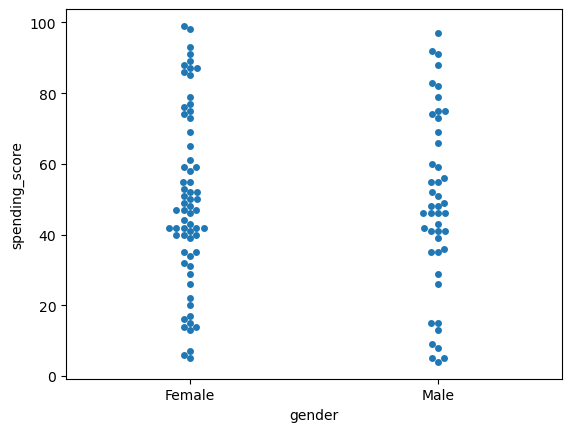

In [37]:
sns.swarmplot(data=train, x='gender', y='spending_score')

<Axes: xlabel='gender', ylabel='spending_score'>

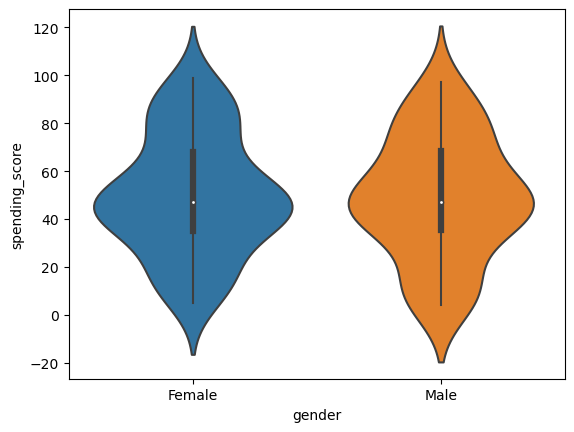

In [38]:
sns.violinplot(data=train, x='gender', y='spending_score')

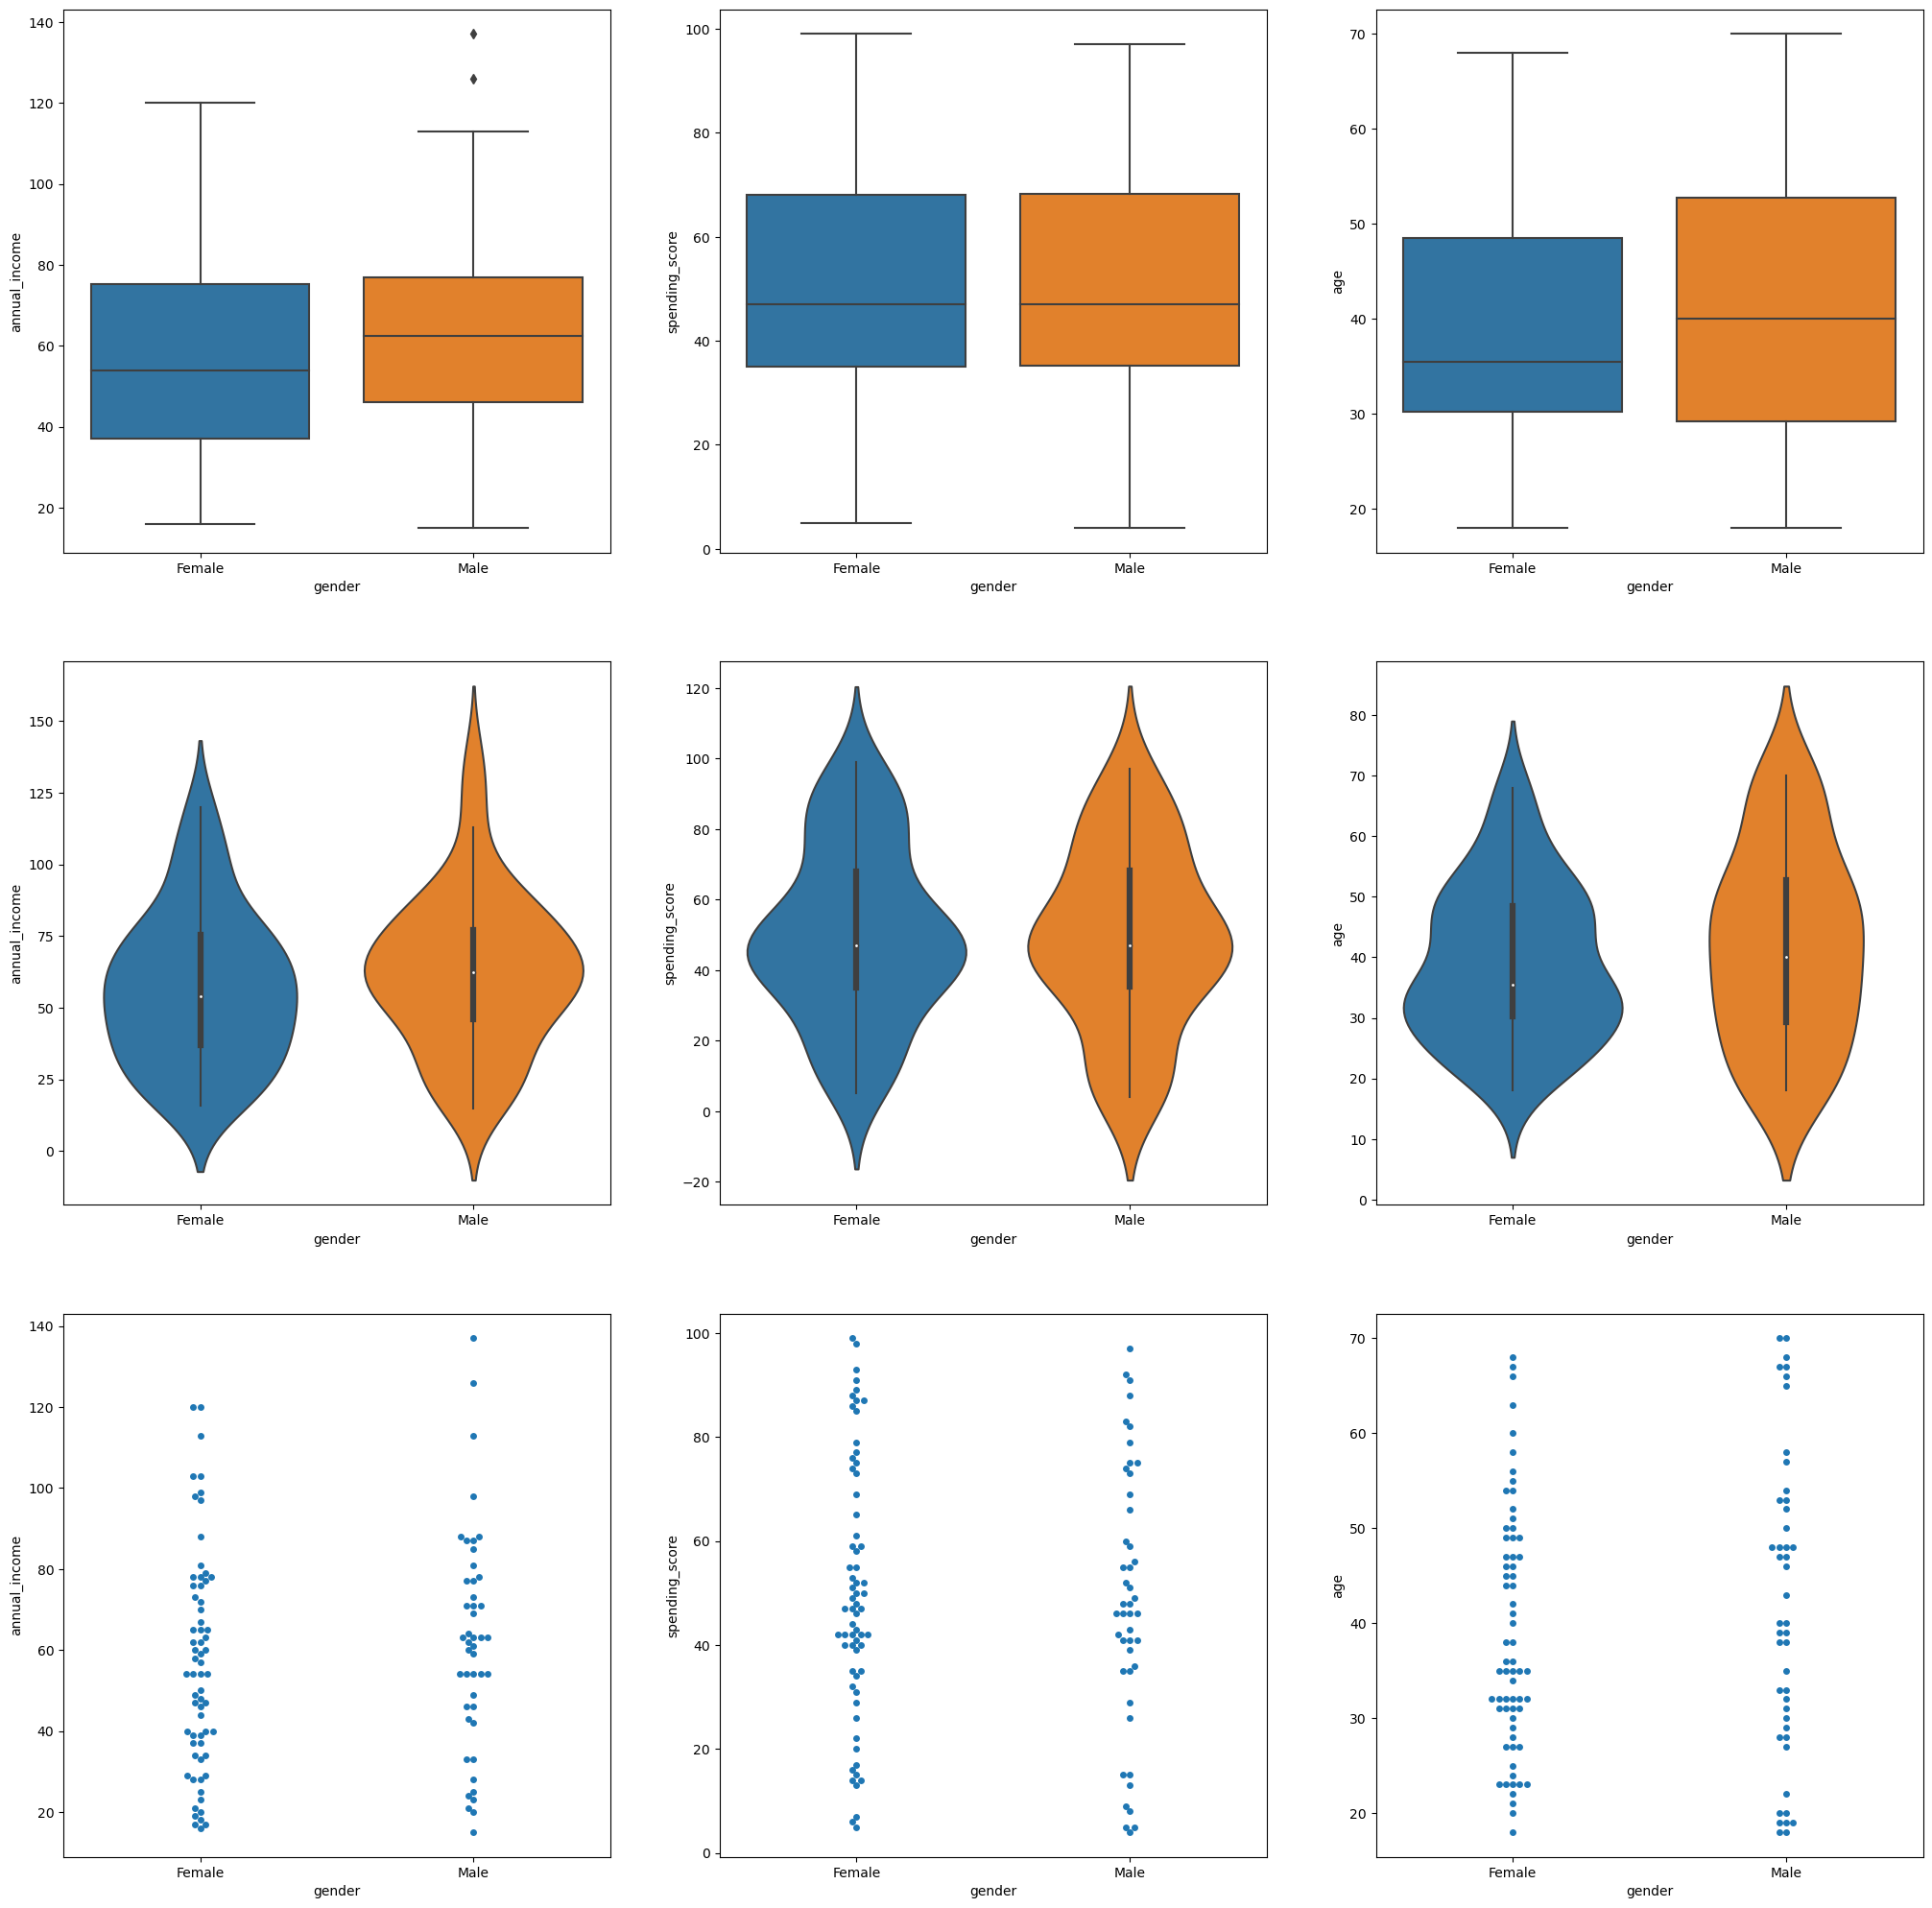

In [41]:
# lets cut the waste on all these single plots and do something
# a bit more clean and fun :)
fig, axs = plt.subplots(3,3,figsize=(25,25))
for col, ax in zip(numericals, axs[0]):
    sns.boxplot(data=train, x='gender', y=col, ax=ax)
for col, ax in zip(numericals, axs[1]):
    sns.violinplot(data=train, x='gender', y=col, ax=ax)
for col, ax in zip(numericals, axs[2]):
    sns.swarmplot(data=train, x='gender', y=col, ax=ax)
plt.show()

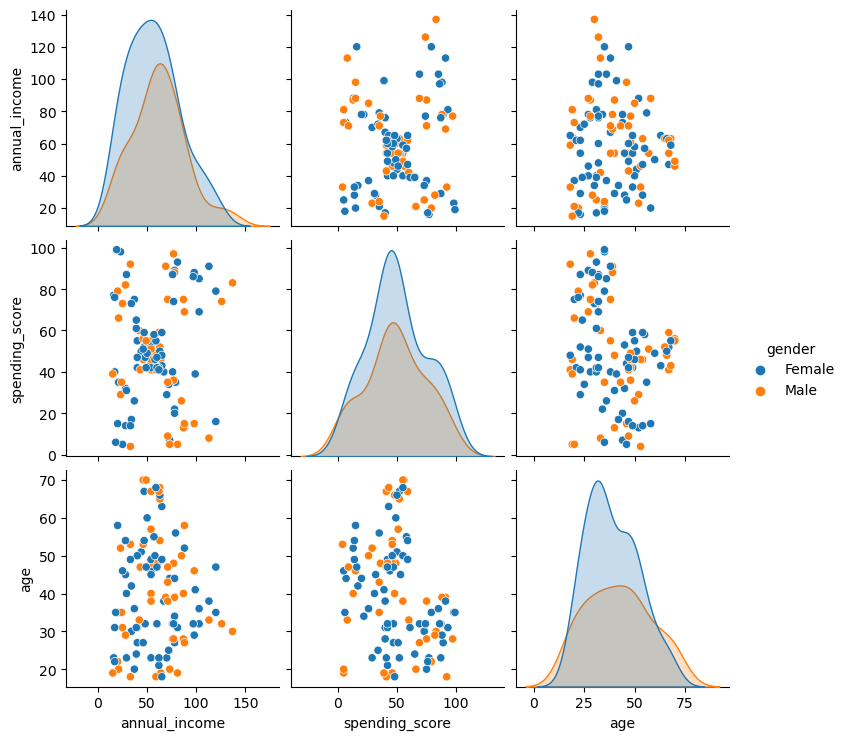

In [42]:
sns.pairplot(data=train[explore_cols], hue='gender')

Gender seems largely inconclusive, but what about that difference that we saw previously in regard to age pockets?

In [43]:
# differences in age on those that are above 40 years old,
# and those that were under 25
# we already know that income is important to spending score
# and that we dont have a lot of extra information from gender,
# so this is our last major distinction to draw here

In [44]:
# Q: how specifically, does age relate to spending score?
# continuous vs a continuous variable

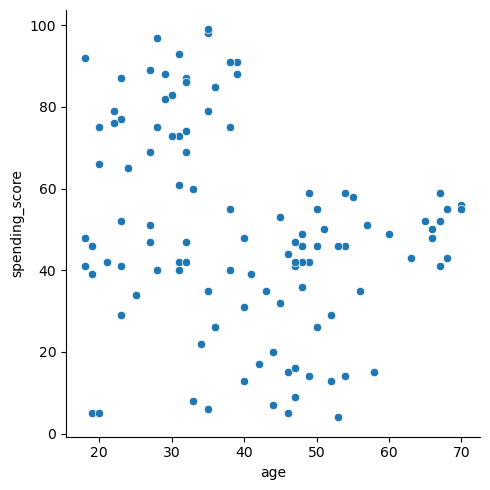

In [45]:
sns.relplot(data=train, x='age', y='spending_score')

In [46]:
# lets make some categories out of age
# so that we compare them similarly to the way that we were comparing gender
# since the differences seem to be specifically in the groupings
# around the lines that we have discussed

In [50]:
# pd.cut(train['age'],[0,25,40,80])

In [51]:
# creating a categorical out of age:
train['age_bins'] = pd.cut(train['age'],[0,25,40,80], labels=['under_26','26_40', 'over_40'])

In [54]:
explore_cols.append('age_bins')

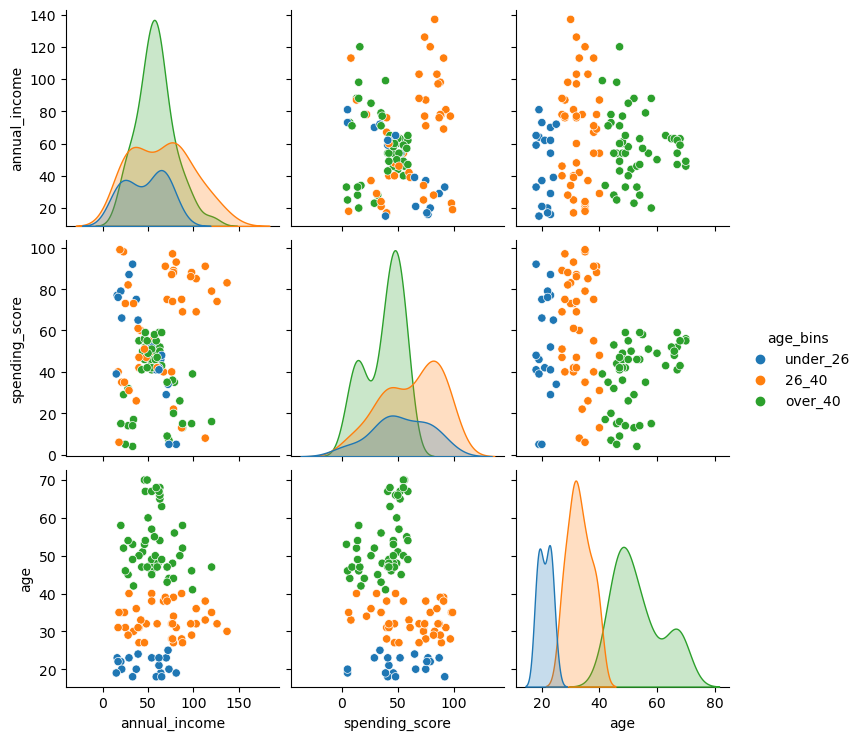

In [55]:
sns.pairplot(data=train[explore_cols], hue='age_bins');

In [56]:
# what about observing differences in those 
# categories for spending score?

# I'm interested in finding the significance of where may be 
# different segments of customer based on these age groups
# categorical vs continuous

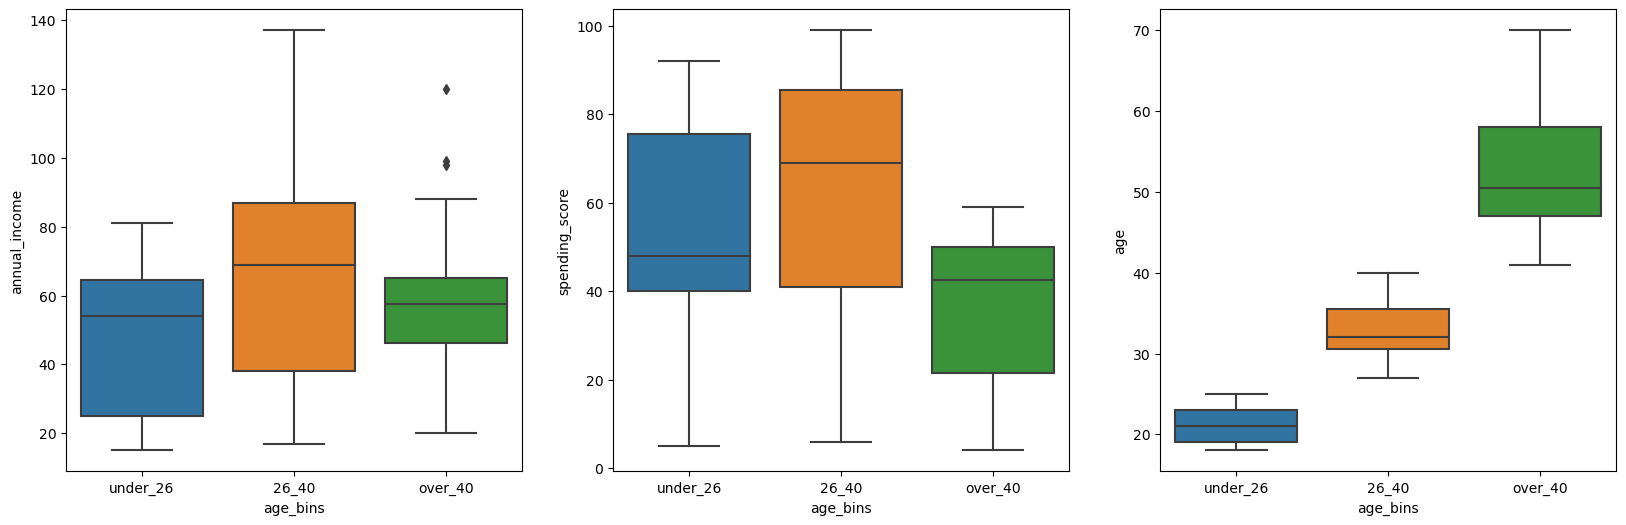

In [58]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
for col, ax in zip(numericals, axs):
    sns.boxplot(data=train, x='age_bins', y=col, ax=ax)
plt.show()

In [59]:
# lets do some actual stats testing because someone may actually
# want to see that theres some math behind that whole
# data science thing you said you were good at

In [60]:
# if i wanted to check parameters for a t test here,
# i may use a shapiro test for normality, followed by a levene test
# for the variances in these two subgroups
# but upon initial univariate investigation, these subsets, ie.
# the entire data set looked not normal at all
# so im going to run with our nonparametric means test, the mannwhitneyu


In [61]:
from scipy.stats import mannwhitneyu

H$_0$: There is no difference in means between the spending score of those that are under 40 to those that are over 40

H$_a$: There is a difference in means between the spending score of those that are under 40 to those that are over 40 (we have evidence to suggest that they come from different distributions)

In [62]:
# from the H0 Ha: We need: an established confidence level to 
# compare the probability of incidence, (p-value)

In [63]:
confidence_level = 0.95
α = 1 - confidence_level
# which means I want p to be less than alpha to suggest 
# that I can reject the null

In [65]:
# so at this point, I just gotta run the test :)
stat, p = mannwhitneyu(train[train.age < 40].spending_score, train[train.age >=40].spending_score)

In [66]:
if p < α:
    print(f'We can reject our null hypothesis\n We have a p value of {p} and a test statitic of {stat}')
else:
    print(f'We fail to reject our null hypothesis\n We have a p value of {p} and a test statitic of {stat}')

We can reject our null hypothesis
 We have a p value of 6.9788428878603265e-06 and a test statitic of 2335.0
